In [83]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn as sl



In [84]:
df1 = pd.read_csv("/Users/eren/Documents/GitHub/Kaggle-Projects/gdz_datathon/med.csv")
df2 = pd.read_csv("/Users/eren/Documents/GitHub/Kaggle-Projects/gdz_datathon/train.csv")
test_df = pd.read_csv("/Users/eren/Documents/GitHub/Kaggle-Projects/gdz_datathon/sample_submission.csv")

df2.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tarih                   40152 non-null  object 
 1   Dağıtılan Enerji (MWh)  40152 non-null  float64
dtypes: float64(1), object(1)
memory usage: 627.5+ KB


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   30 non-null     object
dtypes: object(1)
memory usage: 372.0+ bytes


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tarih                   744 non-null    object 
 1   Dağıtılan Enerji (MWh)  744 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [88]:
df2['month'] = pd.DatetimeIndex(df2["Tarih"]).month
df2['year'] = pd.DatetimeIndex(df2["Tarih"]).year
df2['day'] = pd.DatetimeIndex(df2["Tarih"]).day
df2["hour"] = pd.DatetimeIndex(df2["Tarih"]).hour

#I'm descibing a function to determine month's season which might be useful for training
def month_to_season(month,seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]):
  hmmm = dict(zip(range(1,13), seasons))
  return hmmm[month]

df2["season"] = df2["month"].map(month_to_season)

#also changing column names bc it is easie to do so

df2.rename(columns = {'Tarih':'date', 'Dağıtılan Enerji (MWh)':'energy'}, inplace = True)

In [89]:
df2

,date,energy,month,year,day,hour,season
0,2018-01-01 00:00:00,1593.944216,1,2018,1,0,1
1,2018-01-01 01:00:00,1513.933887,1,2018,1,1,1
2,2018-01-01 02:00:00,1402.612637,1,2018,1,2,1
3,2018-01-01 03:00:00,1278.527266,1,2018,1,3,1
4,2018-01-01 04:00:00,1220.697701,1,2018,1,4,1
...,...,...,...,...,...,...,...
40147,2022-07-31 19:00:00,2492.489498,7,2022,31,19,3
40148,2022-07-31 20:00:00,2479.958245,7,2022,31,20,3
40149,2022-07-31 21:00:00,2485.016884,7,2022,31,21,3
40150,2022-07-31 22:00:00,2396.574255,7,2022,31,22,3


<Axes: xlabel='year', ylabel='energy'>

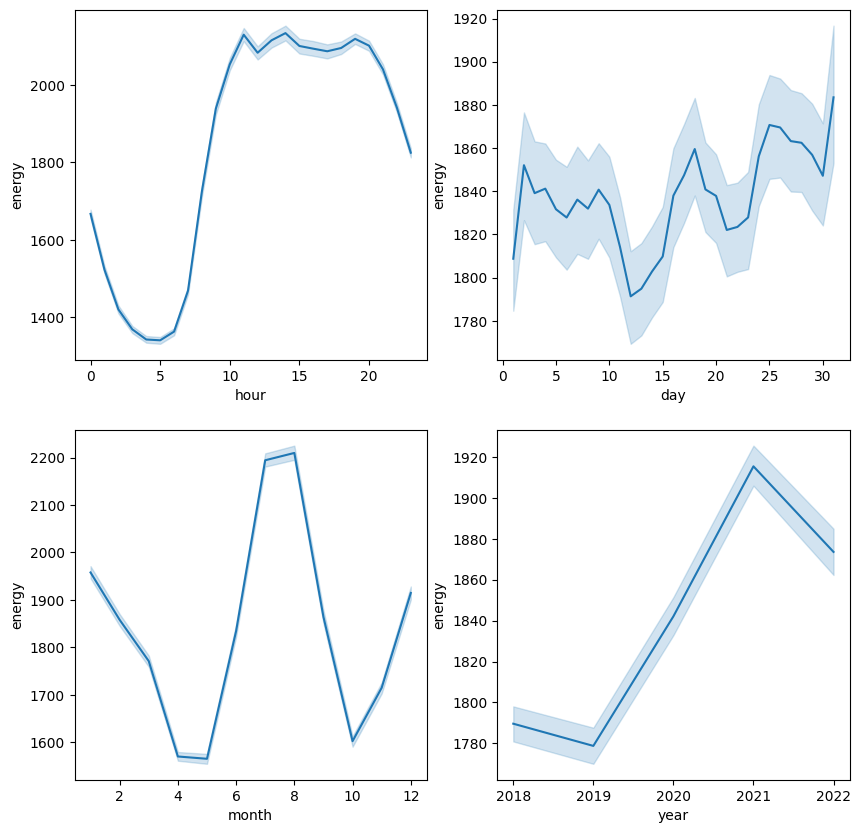

In [90]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

sns.lineplot(data=df2,x="hour",y="energy",ax=axs[0][0])
sns.lineplot(data=df2,x="day",y="energy",ax=axs[0][1])
sns.lineplot(data=df2,x="month",y="energy",ax=axs[1][0])
sns.lineplot(data=df2,x="year",y="energy",ax=axs[1][1])

<Axes: xlabel='season', ylabel='energy'>

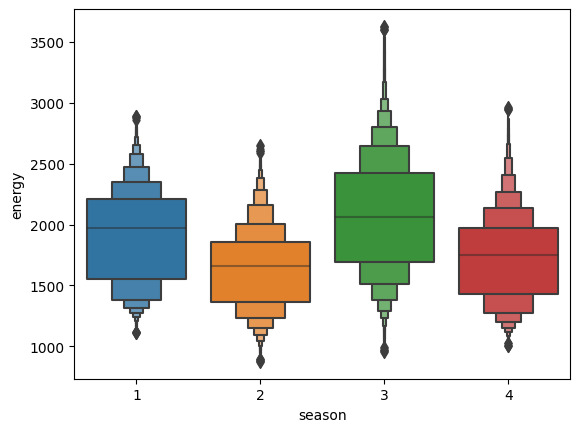

In [91]:
from xgboost import XGBRegressor
sns.boxenplot(data=df2,x="season",y="energy")
#we can see that distributions vary on season

In [92]:
df2["season"].value_counts() #we have a almost fairly balanced season column.

2    11040
3    10296
1    10080
4     8736
Name: season, dtype: int64

In [93]:
display(df2["date"].dtypes)
display(df1["Tarih"].dtypes)


dtype('O')

dtype('O')

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   30 non-null     object
dtypes: object(1)
memory usage: 372.0+ bytes


In [95]:
import datetime as dt
date_list = list()
for value in df1.values:
    date_list.append(value)
for value in date_list:
    value= value.astype(dt.datetime)


In [96]:
date_list

[array(['2019-12-23'], dtype=object),
 array(['2019-06-12'], dtype=object),
 array(['2019-01-25'], dtype=object),
 array(['2019-09-25'], dtype=object),
 array(['2019-03-29'], dtype=object),
 array(['2019-01-12'], dtype=object),
 array(['2019-10-05'], dtype=object),
 array(['2019-01-26'], dtype=object),
 array(['2019-07-11'], dtype=object),
 array(['2019-06-11'], dtype=object),
 array(['2020-02-05'], dtype=object),
 array(['2020-01-06'], dtype=object),
 array(['2021-02-16'], dtype=object),
 array(['2021-01-30'], dtype=object),
 array(['2021-01-27'], dtype=object),
 array(['2021-06-23'], dtype=object),
 array(['2021-10-15'], dtype=object),
 array(['2021-11-29'], dtype=object),
 array(['2021-08-02'], dtype=object),
 array(['2021-11-30'], dtype=object),
 array(['2021-10-12'], dtype=object),
 array(['2021-06-26'], dtype=object),
 array(['2021-02-08'], dtype=object),
 array(['2021-02-02'], dtype=object),
 array(['2021-02-01'], dtype=object),
 array(['2021-11-26'], dtype=object),
 array(['202

In [97]:

def med_or_not(datetimeindex):
    if datetimeindex in df1["Tarih"].values:
        return "MED"
    else:
        pass;
    
df2["MED"] = df2["date"].apply(med_or_not)

In [98]:
display(df1.head())

display(df2.head())

display(df2.MED.nunique())

,Tarih
0,2019-12-23
1,2019-06-12
2,2019-01-25
3,2019-09-25
4,2019-03-29


,date,energy,month,year,day,hour,season,MED
0,2018-01-01 00:00:00,1593.944216,1,2018,1,0,1,None
1,2018-01-01 01:00:00,1513.933887,1,2018,1,1,1,None
2,2018-01-01 02:00:00,1402.612637,1,2018,1,2,1,None
3,2018-01-01 03:00:00,1278.527266,1,2018,1,3,1,None
4,2018-01-01 04:00:00,1220.697701,1,2018,1,4,1,None


0

In [99]:
df2.describe(include="object")

,date,MED
count,40152,0
unique,40152,0
top,2018-01-01 00:00:00,NaN
freq,1,NaN
